In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!cp //content/co2_greenHouseGas_Emissions.csv /content/drive/MyDrive/


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
pd.read_csv("/content/co2_greenHouseGas_Emissions.csv")

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
0,Afghanistan,5.68,98.9,Asia
1,Albania,4.49,10.1,Europe
2,Algeria,177.08,218.9,Africa
3,Angola,20.19,79.7,Africa
4,Anguilla,0.02,NaN,North America
...,...,...,...,...
199,Vietnam,327.91,376.5,Asia
200,Western Sahara,0.24,NaN,Africa
201,Yemen,12.26,21.8,Asia
202,Zambia,9.27,40.7,Africa


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
emissions = pd.read_csv("/content/co2_greenHouseGas_Emissions.csv")

In [8]:
emissions.head()

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
0,Afghanistan,5.68,98.9,Asia
1,Albania,4.49,10.1,Europe
2,Algeria,177.08,218.9,Africa
3,Angola,20.19,79.7,Africa
4,Anguilla,0.02,NaN,North America


In [9]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Region                         204 non-null    object
 1   CO2 Emissions (Mt)             204 non-null    object
 2   Greenhouse Gas Emissions (Mt)  179 non-null    object
 3   Continent                      204 non-null    object
dtypes: object(4)
memory usage: 6.5+ KB


In [10]:
#checking the number of columns with empty values
emissions.isnull().sum()

,0
Region,0
CO2 Emissions (Mt),0
Greenhouse Gas Emissions (Mt),25
Continent,0


In [11]:
#convert columns Co2 emission and Co2 emission to numeric columns
emissions.iloc[25]

,25
Region,Brazil
CO2 Emissions (Mt),466.77
Greenhouse Gas Emissions (Mt),1.0M
Continent,South America


In [12]:
#convert the co2 and GHG columns to numbers and also correct replace the K and M in some rows
def convert_to_numeric(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'K' in value:
            return float(value.replace('K', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        else:
            return pd.to_numeric(value, errors='coerce')
    else:
        return value  # Return the value as is if it's already a number
# Apply the function to the column
emissions['CO2 Emissions (Mt)'] = emissions['CO2 Emissions (Mt)'].apply(convert_to_numeric)
emissions['Greenhouse Gas Emissions (Mt)'] = emissions['Greenhouse Gas Emissions (Mt)'].apply(convert_to_numeric)

In [13]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         204 non-null    object 
 1   CO2 Emissions (Mt)             204 non-null    float64
 2   Greenhouse Gas Emissions (Mt)  179 non-null    float64
 3   Continent                      204 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.5+ KB


In [14]:
emissions.describe()

,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt)
count,204.000000,1.790000e+02
mean,183.228088,1.481890e+05
std,978.063967,1.075987e+06
min,0.020000,1.200000e+00
25%,2.095000,1.820000e+01
50%,12.040000,5.330000e+01
75%,61.650000,2.256000e+02
max,12670.000000,1.240000e+07


In [15]:
#from the table i notice the missing columns in GHG have a low Co2 and also lower Co2 would mean
#low GHG emission too so i decided to use the minimum value to fill in the space
emissions['Greenhouse Gas Emissions (Mt)'] = emissions['Greenhouse Gas Emissions (Mt)'].fillna(emissions['Greenhouse Gas Emissions (Mt)'].min())

In [16]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         204 non-null    object 
 1   CO2 Emissions (Mt)             204 non-null    float64
 2   Greenhouse Gas Emissions (Mt)  204 non-null    float64
 3   Continent                      204 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.5+ KB


In [17]:
#check the sum of two columns
co2_ghg = emissions[['CO2 Emissions (Mt)', 'Greenhouse Gas Emissions (Mt)']].sum()
co2, ghg = co2_ghg
co2, ghg

(37378.53, 26525861.8)

In [18]:
cont = emissions.Continent.value_counts()

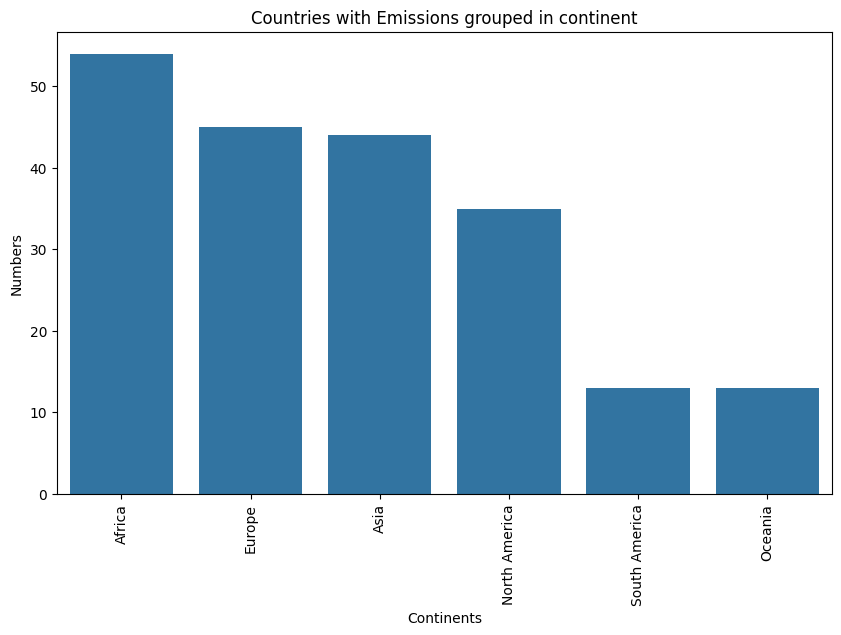

In [19]:
#grouped countries present in the dataset based on continent
plt.figure(figsize=(10, 6))
sns.barplot(x=cont.index, y=cont.values)

plt.title('Countries with Emissions grouped in continent')
plt.xlabel('Continents')
plt.ylabel('Numbers')
plt.xticks(rotation=90)
plt.show()

In [20]:
#group and order countries with emissions based on Co2
continent_co2 = emissions.groupby('Continent')[['CO2 Emissions (Mt)', 'Greenhouse Gas Emissions (Mt)']].sum().sort_values(by="Greenhouse Gas Emissions (Mt)", ascending=False)
continent_co2

,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt)
Continent,,
Asia,22110.77,17007124.8
North America,6092.73,6003396.3
Europe,6210.75,2505486.7
South America,1084.65,1001207.6
Africa,1438.76,4640.3
Oceania,440.87,4006.1


In [21]:
#top 10 countries with the highest emission and 10 countries with the lowest emission
co2 = emissions.sort_values(by='CO2 Emissions (Mt)', ascending=False).head(10)
#top_10_co2 = co2.head(10)

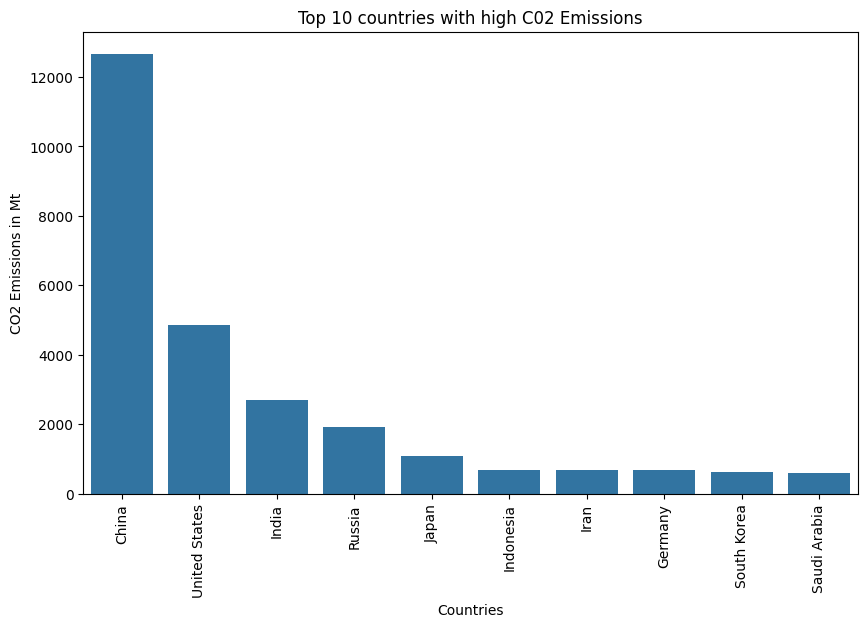

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="CO2 Emissions (Mt)", data=co2)

plt.title('Top 10 countries with high C02 Emissions')
plt.xlabel('Countries')
plt.ylabel('CO2 Emissions in Mt')
plt.xticks(rotation=90)
plt.show()

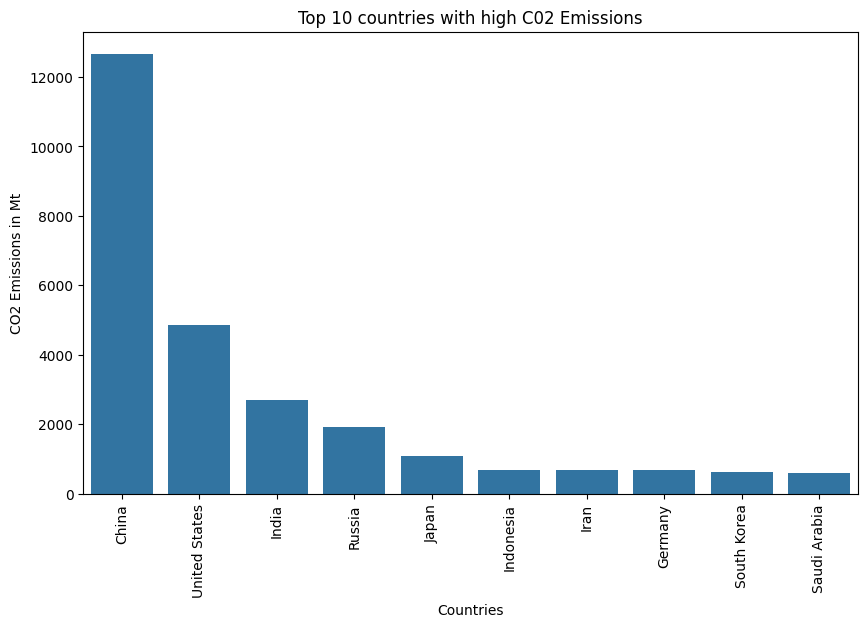

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="CO2 Emissions (Mt)", data=co2)

plt.title('Top 10 countries with high C02 Emissions')
plt.xlabel('Countries')
plt.ylabel('CO2 Emissions in Mt')
plt.xticks(rotation=90)
plt.show()

In [26]:
#top ten regions with the highest Green house emissions
ghg = emissions.sort_values(by='Greenhouse Gas Emissions (Mt)', ascending=False).head(10)
ghg

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
39,China,12670.00,12400000.0,Asia
194,United States,4850.00,6000000.0,North America
86,India,2690.00,3400000.0,Asia
151,Russia,1910.00,2500000.0,Europe
95,Japan,1080.00,1200000.0,Asia
25,Brazil,466.77,1000000.0,South America
87,Indonesia,692.24,969.6,Asia
167,Solomon Islands,0.32,940.0,Oceania
197,Vanuatu,0.22,870.0,Oceania
88,Iran,686.42,828.3,Asia


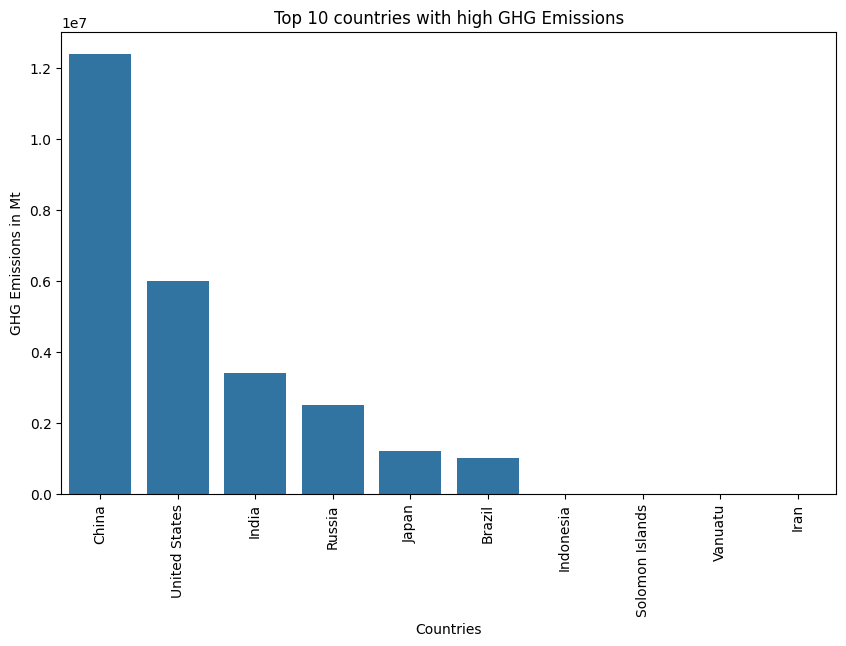

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Greenhouse Gas Emissions (Mt)", data=ghg)

plt.title('Top 10 countries with high GHG Emissions')
plt.xlabel('Countries')
plt.ylabel('GHG Emissions in Mt')
plt.xticks(rotation=90)
plt.show()

In [28]:
#10 countries with the lowest C02 emission
co2low = emissions.sort_values(by='CO2 Emissions (Mt)', ascending=True).head(10)
co2low

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
4,Anguilla,0.02,1.2,North America
155,Saint Pierre and Miquelon,0.04,1.2,North America
26,British Virgin Islands,0.06,1.2,North America
99,Kiribati,0.07,110.0,Oceania
52,Dominica,0.07,240.0,North America
156,Saint Vincent and the Grenadines,0.08,370.0,North America
189,Turks and Caicos Islands,0.09,1.2,North America
153,Saint Kitts and Nevis,0.10,370.0,North America
42,Cook Islands,0.11,1.2,Oceania
75,Grenada,0.12,2.4,North America


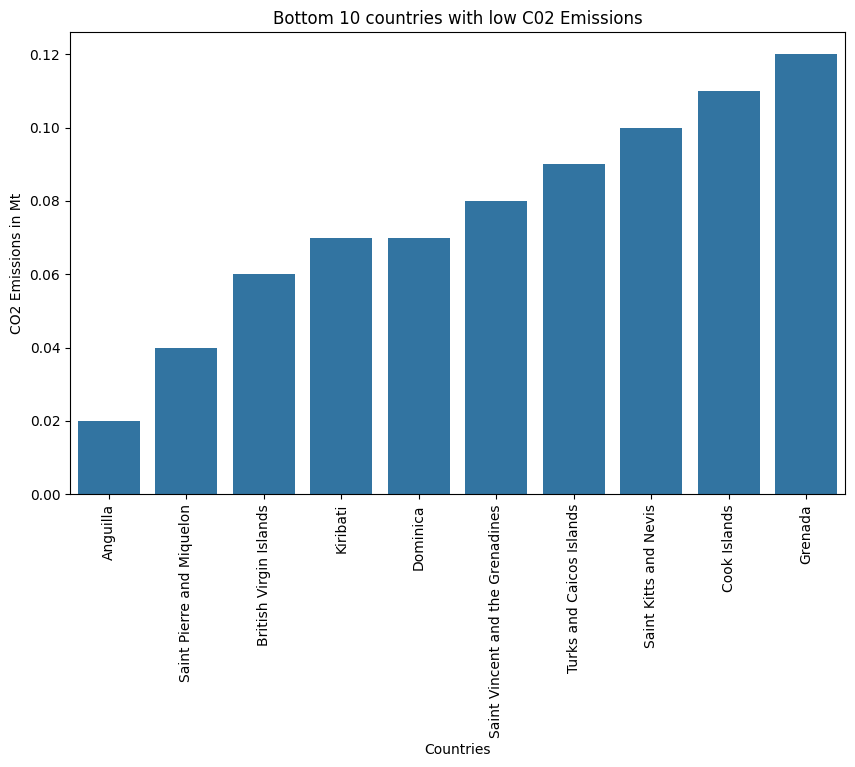

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="CO2 Emissions (Mt)", data=co2low)

plt.title('Bottom 10 countries with low C02 Emissions')
plt.xlabel('Countries')
plt.ylabel('CO2 Emissions in Mt')
plt.xticks(rotation=90)
plt.show()

<Axes: >

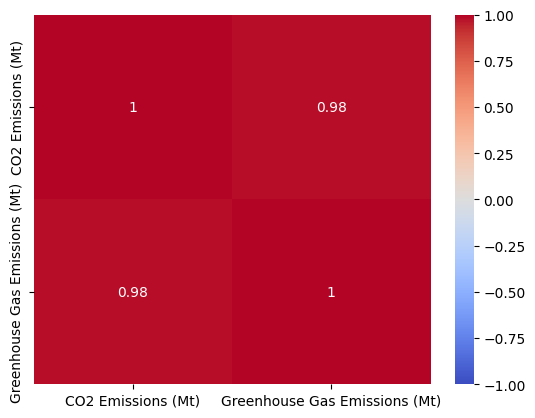

In [30]:
#correlation between Co2 and GHG, an increase in one would result in an increase in the other
co2_ghgcorr = emissions[['CO2 Emissions (Mt)','Greenhouse Gas Emissions (Mt)']].corr()
sns.heatmap(co2_ghgcorr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)